In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("/home/jovyan/")
from pprint import pprint

In [44]:
df = pd.read_csv("work/data/2023/BTC_23_1h.csv")
df

,Unnamed: 0,datetime,open,high,low,close,volume
0,0,2023-01-01 05:30:00,16541.77,16545.70,16508.39,16529.67,4364.83570
1,1,2023-01-01 06:30:00,16529.59,16556.80,16525.78,16551.47,3590.06669
2,2,2023-01-01 07:30:00,16551.47,16559.77,16538.14,16548.19,3318.84038
3,3,2023-01-01 08:30:00,16548.19,16548.19,16518.21,16533.04,4242.08050
4,4,2023-01-01 09:30:00,16533.04,16535.97,16511.92,16521.85,4285.00909
...,...,...,...,...,...,...,...
8755,8755,2024-01-01 01:30:00,42619.04,42680.36,42504.56,42558.01,1015.14035
8756,8756,2024-01-01 02:30:00,42558.02,42670.44,42520.72,42520.72,923.43813
8757,8757,2024-01-01 03:30:00,42520.73,42591.10,42056.00,42257.88,1811.59411
8758,8758,2024-01-01 04:30:00,42257.89,42345.65,42066.00,42283.58,1710.13721


In [45]:
df['ma_20'] = df.close.rolling(20).mean()        #  For 20 day window
df['vol'] =  df.close.rolling(20).std()          # Roliing standard deviation
df['upper_bb'] = df.ma_20 + (2*df.vol)            # upper bollinger band
df['lower_bb'] = df.ma_20 - (2*df.vol)            #lowe bollinger bands

In [46]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,ma_20,vol,upper_bb,lower_bb
0,0,2023-01-01 05:30:00,16541.77,16545.70,16508.39,16529.67,4364.83570,NaN,NaN,NaN,NaN
1,1,2023-01-01 06:30:00,16529.59,16556.80,16525.78,16551.47,3590.06669,NaN,NaN,NaN,NaN
2,2,2023-01-01 07:30:00,16551.47,16559.77,16538.14,16548.19,3318.84038,NaN,NaN,NaN,NaN
3,3,2023-01-01 08:30:00,16548.19,16548.19,16518.21,16533.04,4242.08050,NaN,NaN,NaN,NaN
4,4,2023-01-01 09:30:00,16533.04,16535.97,16511.92,16521.85,4285.00909,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,2024-01-01 01:30:00,42619.04,42680.36,42504.56,42558.01,1015.14035,42448.1965,194.875892,42837.948285,42058.444715
8756,8756,2024-01-01 02:30:00,42558.02,42670.44,42520.72,42520.72,923.43813,42465.7010,184.054340,42833.809680,42097.592320
8757,8757,2024-01-01 03:30:00,42520.73,42591.10,42056.00,42257.88,1811.59411,42474.3710,168.585562,42811.542123,42137.199877
8758,8758,2024-01-01 04:30:00,42257.89,42345.65,42066.00,42283.58,1710.13721,42479.7500,160.065450,42799.880901,42159.619099


In [47]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [48]:
import ta

In [49]:
df['rsi'] = ta.momentum.rsi(df.close, window = 6)

In [50]:
conditions =[(df.rsi<30) & (df.close < df.lower_bb),
             (df.rsi>70) & (df.close > df.upper_bb)]

In [51]:
choices = ['Buy' , 'Sell']

In [52]:
df['signals'] = np.select(conditions ,choices)

In [53]:
df

,Unnamed: 0,datetime,open,high,low,close,volume,ma_20,vol,upper_bb,lower_bb,rsi,signals
0,0,2023-01-01 05:30:00,16541.77,16545.70,16508.39,16529.67,4364.83570,NaN,NaN,NaN,NaN,NaN,0
1,1,2023-01-01 06:30:00,16529.59,16556.80,16525.78,16551.47,3590.06669,NaN,NaN,NaN,NaN,NaN,0
2,2,2023-01-01 07:30:00,16551.47,16559.77,16538.14,16548.19,3318.84038,NaN,NaN,NaN,NaN,NaN,0
3,3,2023-01-01 08:30:00,16548.19,16548.19,16518.21,16533.04,4242.08050,NaN,NaN,NaN,NaN,NaN,0
4,4,2023-01-01 09:30:00,16533.04,16535.97,16511.92,16521.85,4285.00909,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,2024-01-01 01:30:00,42619.04,42680.36,42504.56,42558.01,1015.14035,42448.1965,194.875892,42837.948285,42058.444715,51.796902,0
8756,8756,2024-01-01 02:30:00,42558.02,42670.44,42520.72,42520.72,923.43813,42465.7010,184.054340,42833.809680,42097.592320,46.900692,0
8757,8757,2024-01-01 03:30:00,42520.73,42591.10,42056.00,42257.88,1811.59411,42474.3710,168.585562,42811.542123,42137.199877,26.062699,0
8758,8758,2024-01-01 04:30:00,42257.89,42345.65,42066.00,42283.58,1710.13721,42479.7500,160.065450,42799.880901,42159.619099,29.726173,0


In [54]:
df.dropna(inplace=True)

In [56]:
df.signals = df.signals.shift()

In [57]:
position = False
buydates , selldates = [],[]
buyprices , sellprices = [],[]

for index, row in df.iterrows():
    if not position and row['signals'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.open)
        position = True
    if position and row['signals'] == 'Sell':
       selldates.append(index)
       sellprices.append(row.open)
       position = False

In [58]:
buydates

[66,
 128,
 257,
 426,
 526,
 627,
 707,
 754,
 854,
 928,
 1043,
 1128,
 1195,
 1234,
 1313,
 1415,
 1467,
 1542,
 1576,
 1770,
 1848,
 1941,
 1985,
 2055,
 2130,
 2197,
 2272,
 2427,
 2489,
 2545,
 2599,
 2721,
 2822,
 2882,
 2941,
 3013,
 3047,
 3134,
 3240,
 3304,
 3372,
 3436,
 3569,
 3605,
 3694,
 3784,
 3845,
 3928,
 4054,
 4192,
 4226,
 4280,
 4334,
 4375,
 4436,
 4532,
 4557,
 4628,
 4674,
 4739,
 4906,
 4984,
 5060,
 5129,
 5179,
 5248,
 5297,
 5381,
 5441,
 5579,
 5655,
 5742,
 5799,
 5920,
 5967,
 6059,
 6180,
 6237,
 6308,
 6404,
 6598,
 6665,
 6685,
 6731,
 6886,
 7163,
 7276,
 7336,
 7414,
 7451,
 7559,
 7670,
 7790,
 7840,
 7909,
 8169,
 8242,
 8366,
 8402,
 8466,
 8574,
 8677,
 8705]

In [59]:
selldates

[77,
 141,
 261,
 452,
 598,
 643,
 735,
 765,
 881,
 1007,
 1072,
 1147,
 1232,
 1276,
 1348,
 1422,
 1515,
 1553,
 1659,
 1788,
 1865,
 1960,
 2028,
 2083,
 2150,
 2257,
 2332,
 2463,
 2539,
 2575,
 2681,
 2754,
 2871,
 2919,
 2950,
 3039,
 3109,
 3166,
 3284,
 3352,
 3398,
 3495,
 3587,
 3654,
 3759,
 3807,
 3882,
 3979,
 4074,
 4205,
 4238,
 4307,
 4356,
 4395,
 4471,
 4537,
 4575,
 4646,
 4719,
 4806,
 4934,
 5005,
 5107,
 5151,
 5229,
 5268,
 5318,
 5415,
 5536,
 5633,
 5723,
 5775,
 5872,
 5955,
 5994,
 6107,
 6191,
 6243,
 6402,
 6466,
 6634,
 6684,
 6722,
 6853,
 6905,
 7233,
 7293,
 7391,
 7428,
 7459,
 7644,
 7720,
 7819,
 7858,
 7958,
 8197,
 8320,
 8392,
 8445,
 8486,
 8651,
 8703,
 8728]

In [61]:
buyprices

[16633.15,
 16794.33,
 17347.79,
 20887.85,
 22585.38,
 22781.67,
 23244.5,
 22992.69,
 23166.96,
 22871.28,
 21594.16,
 23517.72,
 24465.4,
 24799.99,
 23191.68,
 23160.47,
 22347.51,
 22369.79,
 22321.98,
 24280.33,
 26907.49,
 27311.28,
 27609.99,
 26903.63,
 27903.69,
 28279.52,
 27947.99,
 29922.04,
 30276.62,
 29946.22,
 30077.76,
 27313.1,
 29096.69,
 28549.42,
 28373.55,
 28935.84,
 28430.09,
 27121.19,
 27205.56,
 27069.55,
 26930.0,
 26804.11,
 27689.14,
 27088.16,
 27071.55,
 26329.15,
 25518.06,
 25865.3,
 26402.26,
 30510.01,
 30222.48,
 30278.0,
 30092.49,
 30513.01,
 30797.13,
 30158.22,
 30153.9,
 30347.99,
 30091.82,
 30161.7,
 29324.0,
 29274.93,
 29270.96,
 29148.01,
 29032.05,
 28937.99,
 29515.27,
 29384.99,
 29335.83,
 26031.61,
 25996.35,
 25946.26,
 27201.63,
 25864.08,
 25588.01,
 25795.33,
 26364.67,
 26484.91,
 27098.73,
 26502.01,
 27554.55,
 27483.43,
 27526.1,
 27811.63,
 26849.44,
 34102.66,
 34236.11,
 34646.0,
 34971.41,
 34627.83,
 37129.99,
 36708.18,

In [62]:
sellprices

[16861.05,
 16897.96,
 17550.57,
 21092.1,
 23592.56,
 23183.91,
 23118.76,
 23571.72,
 22998.82,
 21824.52,
 22040.52,
 24360.66,
 24999.77,
 24454.85,
 23214.53,
 23695.14,
 22360.82,
 22524.46,
 20491.36,
 24826.33,
 27918.86,
 28580.86,
 27919.73,
 27425.98,
 28521.78,
 28571.42,
 27984.97,
 30441.43,
 30309.05,
 29775.61,
 27668.62,
 27577.66,
 29655.18,
 28540.69,
 29107.13,
 28942.66,
 28169.76,
 26684.78,
 27340.6,
 26918.46,
 26957.27,
 26750.22,
 28021.39,
 27071.05,
 26066.12,
 26721.69,
 25974.99,
 25455.49,
 26495.99,
 30858.55,
 30394.56,
 30670.95,
 30564.0,
 30756.65,
 30803.2,
 30332.25,
 30312.82,
 30572.0,
 30379.96,
 30119.99,
 29177.5,
 29293.42,
 29274.42,
 29259.07,
 29086.57,
 29578.56,
 29495.76,
 29600.0,
 26253.3,
 26539.35,
 26060.44,
 27423.44,
 25861.41,
 25782.87,
 25902.87,
 26098.98,
 26599.99,
 26658.66,
 26591.84,
 26442.59,
 27530.06,
 27252.99,
 28012.64,
 26855.64,
 26982.49,
 34210.31,
 34475.98,
 35062.06,
 35206.38,
 35453.98,
 36190.71,
 36674.

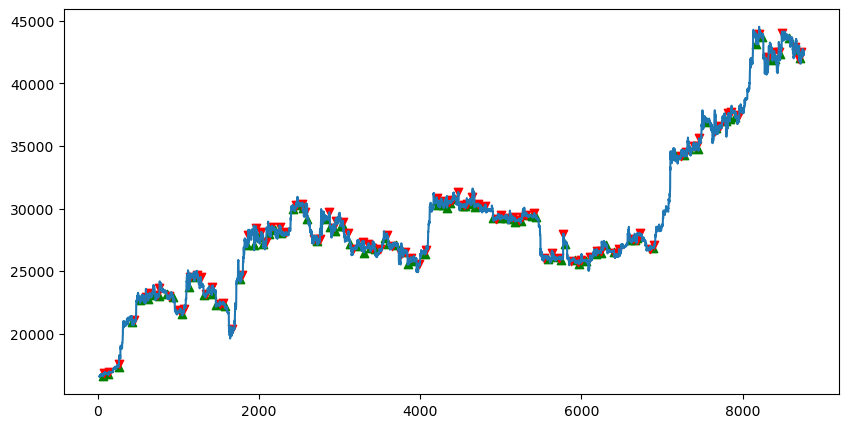

In [64]:
plt.figure(figsize = (10,5))
plt.plot(df.close)
plt.scatter(df.loc[buydates].index , df.loc[buydates].close, marker = '^' , c ='g')   # Generating buysignal
plt.scatter(df.loc[selldates].index , df.loc[selldates].close, marker = 'v' , c ='r')  # Generating sellsignal


In [67]:
(pd.Series([(Sell - Buy)/Buy for Sell , Buy in zip(sellprices, buyprices)])+1).prod()   #cumulative Returns

1.3291091416787288

In [70]:
(pd.Series([(Sell - Buy)/Buy for Sell , Buy in zip(sellprices, buyprices)])+1).prod() -1   # losses

0.32910914167872884